In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/usr/local/python/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [17]:
save = True

In [3]:
aoi_dir = "../../data/external/prox_latam/aoi_rmsantiago.gpkg"

<Axes: >

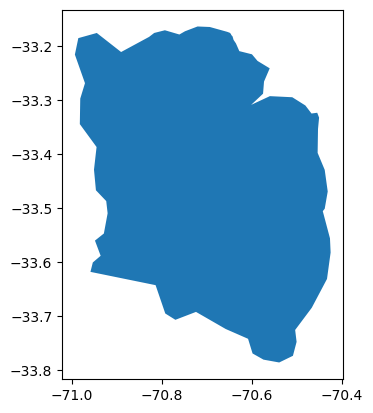

In [4]:
aoi = gpd.read_file(aoi_dir)

#Show
aoi.plot()

In [5]:
dne = gpd.read_file("../../data/external/prox_latam/dne_2017_chile.gpkg")
dne.head(2)

,OBJECTID,REGION,NOM_REGION,COMUNA,NOM_COMUNA,SECCION_CIIU4CL,GLOSA_SECCION,DIVISION_CIIU4CL,GLOSA_DIVISION,geometry
0,1,1,REGIÓN DE TARAPACÁ,1101,IQUIQUE,G,Comercio al por mayor y al por menor; reparaci...,47,"Comercio al por menor, excepto el de vehículos...",POINT (-70.14256 -20.21390)
1,2,1,REGIÓN DE TARAPACÁ,1101,IQUIQUE,G,Comercio al por mayor y al por menor; reparaci...,47,"Comercio al por menor, excepto el de vehículos...",POINT (-70.12391 -20.26698)


In [9]:
# Filter por pois
divisiones = [47,56,59,88,90,91,93,96]
dne_pois = gpd.GeoDataFrame()

for d in divisiones:
    dne_tmp = dne.loc[dne['DIVISION_CIIU4CL'] == f'{d}']
    dne_pois = pd.concat([dne_pois,dne_tmp])

# Format
dne_pois = dne_pois.rename(columns={'DIVISION_CIIU4CL':'code'})
dne_pois = dne_pois[['code','geometry']]
dne_pois['code'] = dne_pois['code'].astype('int64')

# Show
print(dne_pois.shape)
dne_pois.head(2)

(353643, 2)


,code,geometry
0,47,POINT (-70.14256 -20.21390)
1,47,POINT (-70.12391 -20.26698)


In [10]:
salud = gpd.read_file("../../data/external/prox_latam/salud_chile_epsg4326.gpkg")
salud.head(2)

,C_ANT,c_VIG,C_MAD,C_NMAD,C_REG,NOM_REG,C_DEPEND,DEPEN,PERENEC,TIPO,...,TIPO_CAMB,LATITUD,LONGITUD,PRESTADOR,ESTADO,NIVEL_COM,MODALIDAD,COORD_X,COORD_Y,geometry
0,23-030,123030.0,23-010,123010,10.0,Región De Los Lagos,23.0,Servicio de Salud Osorno,Perteneciente,Unidad de Salud Funcionarios,...,Sin cambio,-40.588216,-73.127054,Público,Vigente en operación,Baja Complejidad,Atención Abierta-Ambulatoria,150710.486335,5.498761e+06,POINT (-73.12705 -40.58822)
1,01-030,101030.0,No Aplica,No Aplica,15.0,Región De Arica Parinacota,1.0,Servicio de Salud Arica,Perteneciente,Unidad de Salud Funcionarios,...,Sin cambio,-18.484664,-70.303464,Público,Vigente en operación,Baja Complejidad,Atención Abierta-Ambulatoria,362384.209122,7.955695e+06,POINT (-70.30346 -18.48466)


In [16]:
salud.loc[:,'code'] = 8610
salud_pois = parvularia[['code','geometry']]

# Show
print(pavularia_pois.shape)
pavularia_pois.head(2)

(11951, 2)


,code,geometry
0,611111,POINT (-70.30276 -18.46986)
1,611111,POINT (-70.31758 -18.48249)


In [12]:
parvularia = gpd.read_file("../../data/external/prox_latam/educacion_parvularia_chile_epsg4326.gpkg")
parvularia.head(2)

,AGNO,ID_ESTAB,ORIGEN,NOM_ESTAB,COD_REG_ES,COD_PRO_ES,COD_COM_ES,NOM_COM_ES,COD_DEPROV,NOM_DEPROV,...,NT2_SI,NT2_H,NT2_M,N_TOTAL,DIRECCION,NUMERO,REFERENCIA,LATITUD,LONGITUD,geometry
0,2021.0,2.0,1.0,PARVULARIO LAS ESPIGUITAS,15.0,151.0,15101.0,ARICA,151.0,ARICA,...,0.0,41.0,43.0,170.0,RONALD ROSS,2165.0,POB. JUAN NOE,-18.469862,-70.302757,POINT (-70.30276 -18.46986)
1,2021.0,8.0,1.0,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,15.0,151.0,15101.0,ARICA,151.0,ARICA,...,0.0,23.0,9.0,60.0,SAN MARCOS,611.0,ESQUINA GENERAL LAGOS,-18.482491,-70.317581,POINT (-70.31758 -18.48249)


In [14]:
parvularia.loc[:,'code'] = 611111
pavularia_pois = parvularia[['code','geometry']]

# Show
print(pavularia_pois.shape)
pavularia_pois.head(2)

(11951, 2)


,code,geometry
0,611111,POINT (-70.30276 -18.46986)
1,611111,POINT (-70.31758 -18.48249)


In [13]:
escolar = gpd.read_file("../../data/external/prox_latam/educacion_escolar_chile_epsg4326.gpkg")
escolar.head(2)

,AGNO,RBD,DGV_RBD,NOM_RBD,TIPO_SOST,COD_REG_RB,NOM_REG_RB,COD_PRO_RB,COD_COM_RB,NOM_COM_RB,...,MAT_MHC_AD,MAT_MTP_RE,MAT_MTP_AD,MAT_TOTAL,MAT_HOM_TO,MAT_MUJ_TO,MAT_SI_TOT,CUR_SIM_TO,CUR_COMB_T,geometry
0,2021.0,8484.0,0.0,ESCUELA PUERTO TORO,1.0,12.0,MAG,122.0,12201.0,CABO DE HORNOS,...,0.0,0.0,0.0,5.0,4.0,1.0,0.0,4.0,0.0,POINT (-67.07622 -55.08317)
1,2021.0,8483.0,2.0,LICEO BICENTENARIO DONALD MC-INTYRE GRIFFITHS,1.0,12.0,MAG,122.0,12201.0,CABO DE HORNOS,...,0.0,0.0,0.0,424.0,212.0,212.0,0.0,15.0,0.0,POINT (-67.60534 -54.93480)


In [15]:
escolar.loc[:,'code'] = 611121
escolar_pois = escolar[['code','geometry']]

# Show
print(escolar_pois.shape)
escolar_pois.head(2)

(11285, 2)


,code,geometry
0,611121,POINT (-67.07622 -55.08317)
1,611121,POINT (-67.60534 -54.93480)


In [18]:
pois = pd.concat([dne_pois,salud_pois,pavularia_pois,escolar_pois])

# Show
print(pois.shape)
pois.head(2)

(388830, 2)


,code,geometry
0,47,POINT (-70.14256 -20.21390)
1,47,POINT (-70.12391 -20.26698)


In [19]:
# Save
if save:
    pois.to_file('../../data/external/prox_latam/pois_santiago.gpkg', driver='GPKG')